<a href="https://colab.research.google.com/github/satyambhatt5/Data_science/blob/main/Adult_Census_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!mkdir -p /root/.kaggle/
#!mv kaggle.json /root/.kaggle/

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold,StratifiedKFold
 
#neural network with tensor flow and kearas
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,classification_report,roc_auc_score


In [ ]:
ad=pd.read_csv("/content/drive/MyDrive/Kfold data/adult.csv")
ad.info()
ad.describe()
ad.head()

In [ ]:
ad.occupation.unique()

ad.income.value_counts()


num_coloum=["fnlwgt","age","capital.gain","capital.loss","hours.per.week"]


In [ ]:
ap=ad.drop(num_coloum,axis=1)
ap


#target mapping 
#map target 0 to 1







In [ ]:
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

 


In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(ad)
profile

In [ ]:
! pip install klib

In [ ]:
 

#https://klib.readthedocs.io/en/latest/

import klib
import pandas as pd
df = pd.read_csv('https://github.com/akanz1/klib/raw/main/examples/NFL_DATASET.csv')

klib.missingval_plot(df)

In [ ]:
df_cleaned = klib.data_cleaning(df)

In [ ]:
klib.corr_plot(df_cleaned, annot=False)

In [ ]:
klib.cat_plot(df, figsize=(50,15))

In [ ]:
target={"<=50K":0,  ">50K":1}


ad.iloc[:,-1]= ad.income.map(target)
ad.iloc[:,-1]









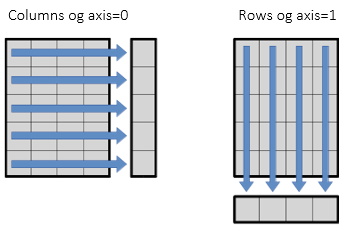

In [ ]:
if __name__ == "__main__":

  #read the data  

  df =pd.read_csv("/content/drive/MyDrive/Kfold data/adult.csv")

  #create the folder Kfold fill with -1

  df["kfold"]=-1

  #next the step randomize the data in row 
  df=df.sample(frac=1).reset_index(drop=True)

  #fetch label

  y=df.income.values

  #initiate the kfold class from model selection 

  kf=StratifiedKFold(n_splits=5)

  #filled with kfold coloums 

  for f,(t_,v_) in enumerate(kf.split(X=df,y = y)):
    df.loc[v_,"kfold"] =f

  #save the new csv in kfold colum

  df.to_csv("//content/drive/MyDrive/Kfold data/adult_fold.csv",index=False)

In [ ]:
#now we are going to delete the some numerical coloum in this data set 

def run(fold):
  #read the data 
  ad=pd.read_csv("/content/drive/MyDrive/Kfold data/adult_fold.csv")

  #delete the some coloum 

  num_coloum=["fnlwgt","age","capital.gain","capital.loss","hours.per.week"]

  ad=ad.drop(num_coloum,axis=1)

  #map target 0 to 1

  target_mapping={"<=50K":0,">50K":1}

  ad.loc[: ,-1]=ad.income.map(target_mapping)

  #all the feature except coloum 


  features= [f for f in ad.columns if f not in ("kfold","income")]
 #fill the nan value and cover the all values in nan value 
 #i am converting the all coloum value in string 
 #it does not matter because it is category value 
  for col in features:
   ad.loc[:,col]= ad[col].astype(str).fillna("None")
 #get training data using fold 

  train_ad= ad[ad.kfold !=fold].reset_index(drop=True)

  #validation data using k fold 

  valid_ad=ad[ad.kfold == fold].reset_index(drop= True)

 #now intilize the one hot encoding technique 

  ohe =OneHotEncoder()

 #now full concat the data training and validation

  full_data =pd.concat([train_ad[features],valid_ad[features]],axis=0)


 #now fit the data 

  ohe.fit(full_data[features])

 #train the data fit and transform 

  x_train= ohe.transform(train_ad[features])

  #valid the data 

  x_valid =ohe.transform(valid_ad[features])

  #initiate the model

  model=LogisticRegression()

  model.fit(x_train,train_ad.income.values)


  #predict the validatin data 

  #we need probility value we are calculating the auc value 

  #we will use probility of it  

  valid_pred= model.predict_proba(x_valid)[:,1]


  #we get the roc and auc score 


  auc=roc_auc_score(valid_ad.income.values,valid_pred)

  print(f"fold = {fold}, auc = {auc}")

 
if __name__ == "__main__":
  for fold_ in range(5):
    run(fold=fold_)
   #run the fold =0
   #we replace with number 


https://colab.research.google.com/drive/1QUtD14XJhpVn8249M9n0oUstQv5PxowC#scrollTo=Xi3XblvvHgVD

In [ ]:
#label encoder and xgboost algorthim 

def run(fold):
  md=pd.read_csv("/content/drive/MyDrive/Kfold data/adult_fold.csv")

  #delete the some coloum 

  num_coloum=["fnlwgt","age","capital.gain","capital.loss","hours.per.week"]

  md=md.drop(num_coloum,axis=1)

  #map target 0 to 1

  target_mapping={"<=50K":0,">50K":1}

  md.loc[: ,-1]=md.income.map(target_mapping)


  features= [f for f in md.columns if f not in ("kfold","income")]
  #fill the nan value and cover the all values in nan value 
  #i am converting the all coloum value in string 
  #it does not matter because it is category value 
  for col in features:
    md.loc[:, col]= md[col].astype(str).fillna("None")

  for col in features:
    lb =LabelEncoder()

    #fitt label encoder in all the data 

    lb.fit(md[col])

    #transform the all data 
 
  md.loc[:,col] =lb.transform(md[col])

  #get training data using fold 

  train_md= md[md.kfold !=fold].reset_index(drop=True)

  #validation data using k fold 

  valid_md=md[md.kfold == fold].reset_index(drop= True)


  #train the data fit and transform 

  x_train= train_md[features].values

  #valid the data 
  x_valid = valid_md[features].values

  #initiate the model

  model=xgb.XGBClassifier(job=-1)

  model.fit(x_train, train_md.income.values)

  #predict the validatin data 

  #we need probility value we are calculating the auc value 

  #we will use probility of it  

  valid_pred= model.predict_proba(x_valid)[:,1]


  #we get the roc and auc score 


  auc=roc_auc_score(valid_md.income,valid_pred)

  print(f"fold = {fold}, auc = {auc}")

 
if __name__ == "__main__":
  for fold_ in range(5):
    run(fold=fold_)
   #run the fold =0
   #we replace with number 